# Heap Sort 學習歷程、流程圖

哲學四 05113010 陳鳳庭

## Content
   
   - [Heap Sort 學習歷程](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20heap%20sort.ipynb#Heap-Sort-%E5%AD%B8%E7%BF%92%E6%AD%B7%E7%A8%8B)
       - [課堂練習](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20heap%20sort.ipynb#%E8%AA%B2%E5%A0%82%E7%B7%B4%E7%BF%92)
       - [嘗試創建原始碼](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20heap%20sort.ipynb#%E5%98%97%E8%A9%A6%E5%89%B5%E5%BB%BA%E5%8E%9F%E5%A7%8B%E7%A2%BC)
       - [回頭改善模擬範例Code](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20heap%20sort.ipynb#%E5%9B%9E%E9%A0%AD%E6%94%B9%E5%96%84%E6%A8%A1%E6%93%AC%E7%AF%84%E4%BE%8BCode)
   - [Heap Sort 流程圖](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20heap%20sort.ipynb#Heap-Sort-%E6%B5%81%E7%A8%8B%E5%9C%96)
       - Flowchart
       - Demo
   - [參考資料](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20learning%20heap%20sort.ipynb#%E5%8F%83%E8%80%83%E8%B3%87%E6%96%99)
   
          P.S.此處連結會另外開啟分頁

___

## Heap Sort 學習歷程

### Heap Sort ：
       1. 將list架構為heap二元樹結構
       2. 將最上面balance的值抽出，重新balance

### 課堂練習

上完課對heap sort的演算法有所了解，但還是對如何用程式運作沒有什麼想法，所以先從老師給的範例code來學習

- [最後成果](https://github.com/vanikk06/Data-structures-and-Algorithms/tree/master/week_6#design-heap-sort)
- 👇🏻過程

#### 先解決老師上課提到的bug問題

In [2]:
## 範例code
    # 問題：從最後一個值，一個個把array的值放入heapify內，放入i = 5，l = 11，r = 12，皆超過array的長度

def heapify(arr, n, i): 
    largest = i # Initialize largest as root    #👈🏻問題
    l = 2 * i + 1    # left = 2*i + 1           #👈🏻👈🏻
    r = 2 * i + 2    # right = 2*i + 2          #👈🏻👈🏻

    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 

    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 

    # Change root, if needed
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i] # swap 

        # Heapify the root. 
        heapify(arr, n, largest) 

# The main function to sort an array of given size 
def heapSort(arr): 
    n = len(arr) 

    # Build a maxheap. 
    for i in range(n, -1, -1):           #👈🏻問題
        heapify(arr, n, i) 

    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0) 

arr = [4, 10, 3, 5, 1]
heapSort(arr)
arr

[1, 3, 4, 5, 10]

檢查range

In [4]:
n = len(arr)
for i in range(n, -1, -1):
    print(i)

5
4
3
2
1
0


👆🏻i的個數超過array長度，且i為index，多一個5

In [7]:
for i in range(n-1, -1, -1):
    print(i)

4
3
2
1
0


In [9]:
for i in range(n):
    print(i)

0
1
2
3
4


更改：把range改為符合index值的，並改為從前面一個個放入

In [10]:
## 範例code
    # 問題：從最後一個值，一個個把array的值放入heapify內，放入i = 5，l = 11，r = 12，皆超過array的長度

def heapify(arr, n, i): 
    largest = i # Initialize largest as root    #👈🏻問題
    l = 2 * i + 1    # left = 2*i + 1           #👈🏻👈🏻
    r = 2 * i + 2    # right = 2*i + 2          #👈🏻👈🏻

    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 

    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 

    # Change root, if needed
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i] # swap 

        # Heapify the root. 
        heapify(arr, n, largest) 

# The main function to sort an array of given size 
def heapSort(arr): 
    n = len(arr) 

    # Build a maxheap. 
    for i in range(n):           #✍🏻更改
        heapify(arr, n, i) 

    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0) 

arr = [4, 10, 3, 5, 1]
heapSort(arr)
arr

[1, 3, 4, 5, 10]

發現：其實不影響heap架構樹，因為heap樹在比較時，已經設立要在孩子的index小於array長度的情況下才會進行

    P.S.即使將放入順序改為從第一個放入，在一個個放入的情況下，孩子的index也會超過array長度（以arr為例，在index=2的時候就超過了）

#### 理解Code，並自己重新打一遍

理解Code之後，蓋起來，試著自己打一次

In [16]:
## 模擬範例Code

#建立heap的樹狀結構：Maxheap
    # To heapify subtree rooted at index i.
    # n:size of heap
    

def heapify(arr, n, i):
    largest = i    #最初的largest
    left = 2*i+1   #左邊孩子
    right = 2*i+2  #右邊孩子
    
    if left < n and arr[i] < arr[left]:          #與左邊孩子比較
        largest = left
        
    if right < n and arr[largest] < arr[right]:  #與右邊孩子比較
        largest = right
        
    if largest != i:                             #交換
        arr[i], arr[largest] = arr[largest], arr[i]
        
        heapify(arr, n, largest)                 #繼續往下比
        
        
#用剛剛建起的樹狀結構來進行排序
    # The main function to sort an array of given size

def heap_sort(arr):
    n = len(arr)
    
    # Build a maxheap.
    for i in range(n):
        heapify(arr, n, i)
        
    # One by one extract elements
    for i in range(n-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0] #抽出最大的
        heapify(arr, i, 0)              #re-balance改變size of heap
        
arr = [4, 10, 3, 5, 1]
heap_sort(arr)
arr

[1, 3, 4, 5, 10]

發現另一個bug：若最大值存在root的sub-subnode內，因無回頭check，會出現bug

In [17]:
arr1 = [4, 3, 5, 10, 1]
heap_sort(arr1)
arr1

[1, 3, 4, 10, 5]

---

### 嘗試創建原始碼

#### 目標：試圖解決模擬範例Code遇到的bug
    
    Bug存在的原因在於，由上往下架構heap，當child往上與parents交換時，沒有回頭往上檢查parents與他的parents是否符合heap架構

#### 解決方法：
       
       (1). 正面解決：若發生child與parents交換的情形，就必須回頭檢查，若再向上交換，又必須回頭檢查→ 👎🏻複雜且耗時耗能
       (2). 反面解決：由下往上去架構heap → 👍🏻架構一次即可，不須額外消耗

再參考網頁資料釐清觀念，觀摩[影片](https://www.youtube.com/watch?v=j-DqQcNPGbE)將程式編譯方式後，嘗試用python與minheap創建原始碼

#### 想法

利用list建立heapsrt，用index的指定關係來建立樹狀結構 → 將list想像成樹狀結構，每個node都因index存在而存在，只是不一定符合heap的架構

先建立一個函式，讓node符合heap架構
  - ˍheapity：堆疊化

要從哪一個node開始進行_heapity
  - ˍbuildˍminheap：由下往上進行_heapity，可避免前面遇到的bug

用balance的heap來進行heap sort，因改用minheap，為了維持空間複雜度是in-place，不額外建立list，改採將balance的min抽出，放到最後一個
  - heapˍsort：將balance的值取出，讓其re-balance

#### heapity：堆疊化

功能：讓node符合heap架構
        1. 完全的二元樹：由上往下、由左往右生成
        2. parents必小於child

與範例程式相同，透過index指定的方式，讓list符合heap架構

In [2]:
##架構heap

def _heapity(list, n, i):
    if i >= n:                                    #當新parents的index超過list長度就不須再往下檢查
        return                                      #等於list長度也不需要，因其必為child
                                                  #index
    Min = i                                         #最初放入的index為i,暫定為Min(parents)
    left = 2*i+1                                    #parents與左邊child關係
    right = 2*i+2                                   #parents與右邊child關係
    
    if left < n and list[Min] > list[left]:       #parents與左邊child比較
        Min = left                                #若left在list長度內，且其值小於Min，則取代Min
    
    if right < n and list[Min] > list[right]:     #parents與右邊child比較
        Min = right                               #若right在list長度內，且其值小於Min，則取代Min
        
    if Min == left or Min == right:                                  #若Min發生改變
        list[i], list[Min] = list[Min], list[i]   #則將i(parents)的值與Min的值交換
        
        _heapity(list, n, Min)                     #以新的parents繼續往下檢查

#### 建立minheap

由後往前一個個對list內的值進行heapity

不須從最後一個開始，因為最後一個node必為child，即使對其進行heapity也是空轉，因此從最後一個child的parents開始進行heapity即可

In [3]:
##由下往上進行heapity

def _build_minheap(list, n):
    last = n-1                          #最後一個node
    parents = (last-1)//2               #child與parents的關係，取整數位
    for i in range(parents, -1, -1):    #由後往前一個個進行heapity並往上堆疊
        _heapity(list, n, i)

檢查除法語法

In [21]:
6%2 #除法：取餘數

0

In [25]:
6//2 #除法：取商數

3

調整range範圍

In [26]:
for i in range(5, -1, -1):
    print(i)

5
4
3
2
1
0


#### 建立heap sort

把balance的minheap的第一個值抽出，放到list的最後一個，破壞balance，改變heap的size讓其re-balance

In [4]:
##以minheap進行heap sort

def heap_sort(list):
    n = len(list)                   
    
    _build_minheap(list, n)         
    
    for i in range(1,5):            #👈🏼
        list.append(list.pop(0))
        _heapity(list, n-i, 0)
    
    return list

檢查語法

In [28]:
a = [3,5,2,4]
a.append(a.pop(0))
a

[5, 2, 4, 3]

In [60]:
a = [3,5,2,4]
print(len(a))

for i in range(1,5):
    a.append(a.pop(0))
    print(i)
    print(a)

4
1
[5, 2, 4, 3]
2
[2, 4, 3, 5]
3
[4, 3, 5, 2]
4
[3, 5, 2, 4]


❌測值：失敗，回頭修改

In [6]:
c = [3,6,2,9,67,4,1,2,42,4,2,890]
heap_sort(c)

[3, 4, 6, 9, 42, 4, 67, 890, 1, 2, 2, 2]

In [7]:
##以minheap進行heap sort

def heap_sort(list):
    n = len(list)
    
    _build_minheap(list, n)
    
    for i in range(1,n+1):            #👈🏼
        list.append(list.pop(0))
        _heapity(list, n-i, 0)        #👈🏻
        
    return list

❌測值：失敗，回頭修改

In [8]:
c = [3,6,2,9,67,4,1,2,42,4,2,890]
heap_sort(c)

[1, 2, 2, 2, 3, 4, 6, 4, 9, 42, 67, 890]

In [58]:
len(c)

12

手畫了一下Demo，發現bug跟模擬範例Code的問題一樣，抽出後若使用_heapity去re-balance會出現與前面相同的問題，因此改用_build_minheap去re-balance

In [9]:
##以minheap進行heap sort

def heap_sort(list):
    n = len(list)                  #list長度(node個數)    
    
    _build_minheap(list, n)        #建立minheap
    
    for i in range(1,n+1):
        list.append(list.pop(0))
        _build_minheap(list, n-i)  #👈🏻
    
    return list

⭕測值：成功

In [10]:
c = [3,6,2,9,67,4,1,2,42,4,2,890]
heap_sort(c)
c

[1, 2, 2, 2, 3, 4, 4, 6, 9, 42, 67, 890]

發現bug並成功debug之後才知道，原來一開始理解範例Code時，對進行heap sort的發法了解的不夠透徹，現在已經比較清楚了

### 回頭改善模擬範例Code

模擬範例Code的bug是因為我將heapity順序改為由上往下，範例Code原為由下往上，或許範例Code原本不存在此問題

In [68]:
## 範例code
    # 問題：從最後一個值，一個個把array的值放入heapify內，放入i = 5，l = 11，r = 12，皆超過array的長度

def heapify(arr, n, i): 
    largest = i # Initialize largest as root    
    l = 2 * i + 1    # left = 2*i + 1           
    r = 2 * i + 2    # right = 2*i + 2          

    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 

    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 

    # Change root, if needed
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i] # swap 

        # Heapify the root. 
        heapify(arr, n, largest) 

# The main function to sort an array of given size 
def heapSort(arr): 
    n = len(arr) 

    # Build a maxheap. 
    for i in range(n, -1, -1):           #👈🏻👈🏻
        heapify(arr, n, i) 

    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0) 

arr1 = [4, 3, 5, 10, 1]
heap_sort(arr1)
arr1

[1, 3, 4, 5, 10]

確實，其所存在bug只有range範圍設錯，更改為正確range範圍

In [69]:
## 範例code
    # 問題：從最後一個值，一個個把array的值放入heapify內，放入i = 5，l = 11，r = 12，皆超過array的長度

def heapify(arr, n, i): 
    largest = i # Initialize largest as root    
    l = 2 * i + 1    # left = 2*i + 1           
    r = 2 * i + 2    # right = 2*i + 2          

    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 

    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 

    # Change root, if needed
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i] # swap 

        # Heapify the root. 
        heapify(arr, n, largest) 

# The main function to sort an array of given size 
def heapSort(arr): 
    n = len(arr) 

    # Build a maxheap. 
    for i in range(n-1, -1, -1):           #✍🏻✍🏻更改
        heapify(arr, n, i) 

    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0) 

arr1 = [4, 3, 5, 10, 1]
heap_sort(arr1)
arr1

[1, 3, 4, 5, 10]

#### 範例Code VS. 嘗試創建原始碼

兩者皆使用由下往上的方式，將list建構heapity結構，但範例Code從最後一個開始去建構的方式，會造成後面幾個node進行空轉的情形，相比我從參考影片觀摩到的從最後一個node的parents開始heapity的方法，較優

---

## Heap Sort 流程圖

- Flowchart

     ◎ heap_sort


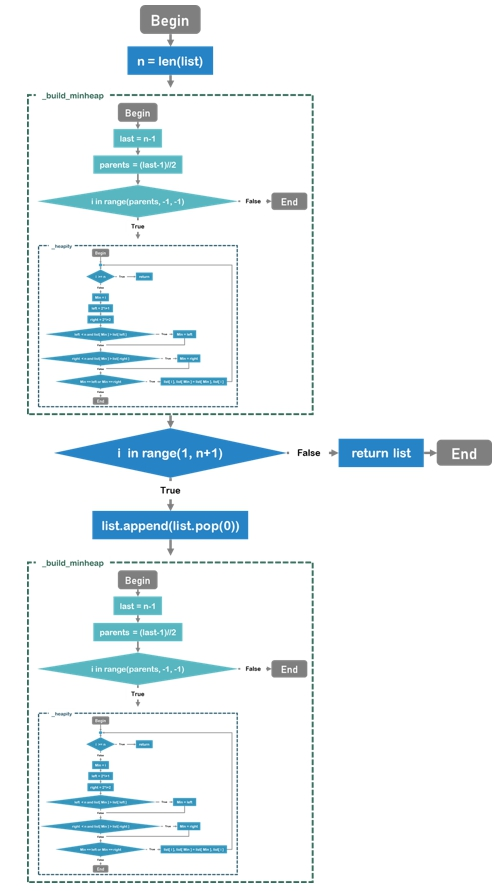

In [8]:
#heap_sort
from IPython.display import Image
Image(filename="1573153309780.jpg", width=400, height=800)

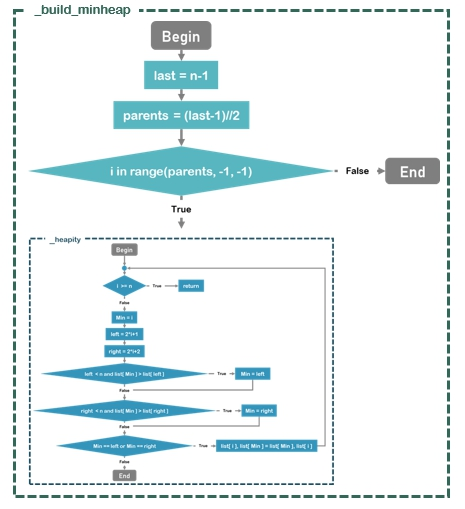

In [14]:
#_build_minheap
Image(filename="1573153821618.jpg", width=400, height=400)

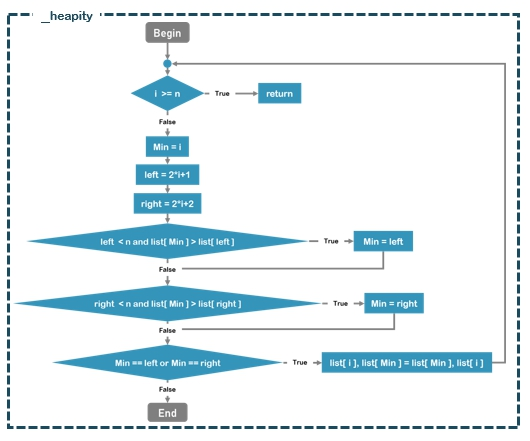

In [15]:
#_heapity
Image(filename="1573153794189.jpg", width=500, height=500)

 - Demo

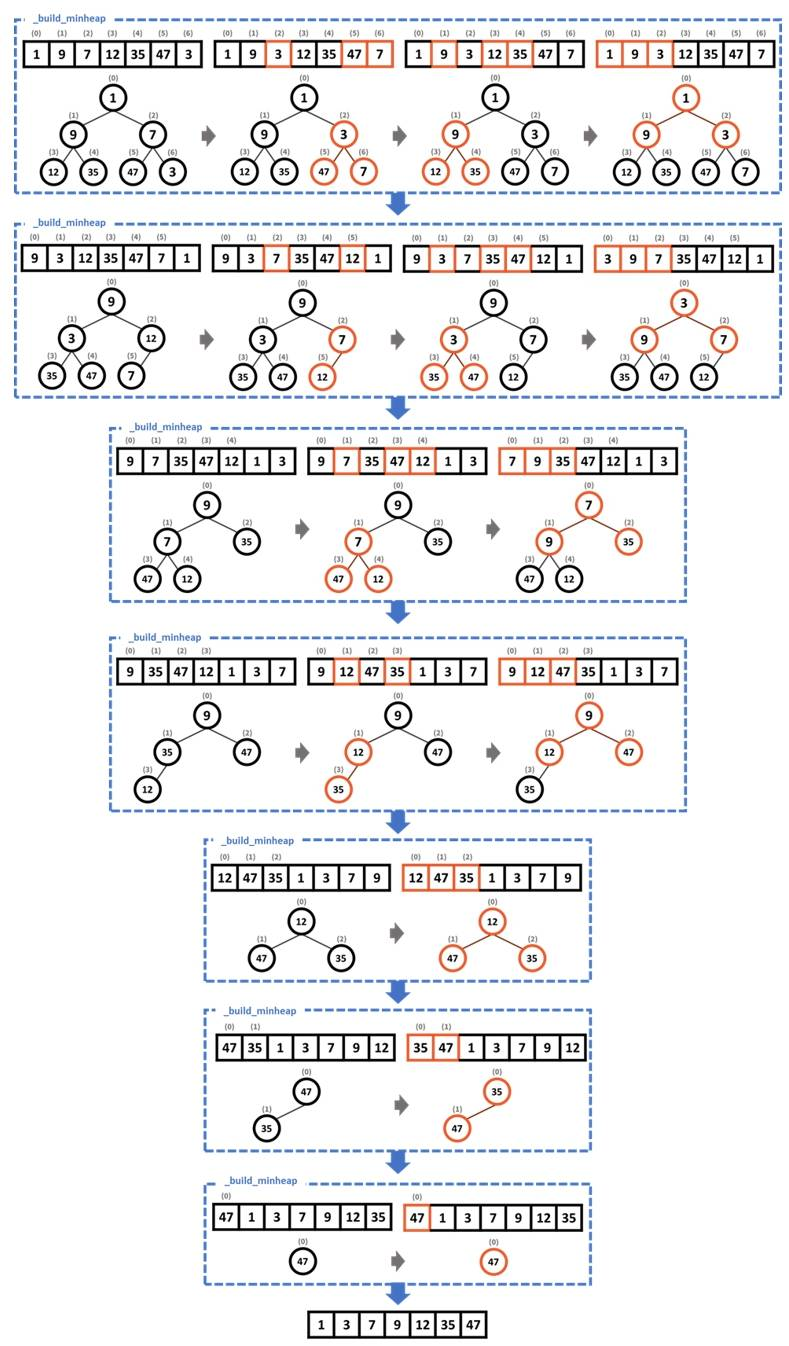

In [18]:
Image(filename="150261.jpg", width=800, height=600)

---

## 參考資料

- [課堂範例Code](https://github.com/pecu/DSA/blob/master/06_HeapSort/heapSort.py)
- [影片_堆排序(Heapsort)](https://www.youtube.com/watch?v=j-DqQcNPGbE)
- [heapq --- 堆積佇列 (heap queue) 演算法](https://docs.python.org/zh-tw/3/library/heapq.html)
- [演算法 堆積排序法(Heap Sort)](http://notepad.yehyeh.net/Content/Algorithm/Sort/Heap/Heap.php)
- [Heap - 堆](https://algorithm.yuanbin.me/zh-tw/basics_data_structure/heap.html)